# PROJETO SATISFAÇÃO EM SERVIÇOS AÉREOS 
# Introdução, objetivos, especificações técnicas, métodos preditivos

João Reis e Rafael Mello Vieira


#Predição da satisfação de clientes de uma companhia aérea através de algoritmos de classificação

##Introdução 

As empresas centradas nos clientes consideram prioritária a mensuração da qualidade dos serviços e a satisfação dos seus usuários. Comparar o desempenho da empresa com a expectativa é a base do conceito de satisfação dos clientes. Esse indicador está relacionado ao maior retorno sobre o investimento (ROI), fidelização, volume de compras e valorização da marca. Um sistema de avaliação da satisfação é a base para decisões quanto à gestão da qualidade dos serviços. Entretanto, a obtenção desses dados é feita por levantamentos envolvendo diversos fatores do ciclo de serviço, que geralmente tem muitas etapas, sendo que algumas delas não são percebidas ou valorizadas pelos clientes. 

Os fatores que mais contribuem para a satisfação devem ser valorizados e comunicados para sua clientela, o que pode gerar um círculo virtuoso de mais satisfação, mais vendas e mais lucros. A moldagem dos fatores que geram satisfação ou que evitam a insatisfação faz com que as empresas modifiquem as operações e ações de marketing.

Um indicador norte-americano de satisfação do cliente, American Customer Satisfacion Index - ACSI (2014, citado em Kotler e Keller, 2018), aponta que a líder desse índice no setor de transportes aéreos, JetBlue, obteve a pontuação de 79 numa escala de 100 pontos. Esse exemplo mostra o quanto esse indicador tem valor interno e externo à empresa.

Características dos clientes, o tipo de voo e as diversas etapas do ciclo do serviço aéreo, compostos por diversas variáveis, devem ser conhecidos quanto à sua contribuição para a satisfação do cliente. A diferenciação de serviços dificulta a generalização de instrumentos de coleta de dados, porém há muitas lições a serem aprendidas em datasets sobre satisfação de clientes em empresas áreas, como o apresentado neste projeto.





##Objetivo

Esse projeto tem como objetivo aplicar e avaliar algoritmos de machine learning para a predição de quais variáveis contribuem para o indicador de satisfação de clientes de um dataset de companhia aérea.



##Especificação Técnica
**Dataset**: Para desenvolvimento desse projeto, foi utilizado o dataset
denominado Airline Passenger Satisfaction, disponível em: <https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction>, que contém dados anonimizados de uma empresa não identificada.

A base de dados está em formato CSV, sendo composta por dois arquivos: train.csv e test.csv. O dataset possui 25 colunas e 129880 linhas, divididas em 80% no dataset de treino e 20% no dataset de teste (arquivos originalmente separados). A análise dos dados será feita na linguagem Python.



**Métodos de Pré-processamento**:



Antes da aplicação dos métodos de Machine Learning é necessário o tratamento dos dados. Inicialmente serão realizadas as seguintes atividades de pré-processamento dos dados:

* Compreensão do significado de cada variável do banco de dados;
* Remoção da colunas desnecessárias, caso haja;
* Análise e tratamento de dados faltantes (missing data);
* Identificação e tratamento de dados inconsistentes, duplicados ou outliers.



** MÉTODOS DE PREDIÇÃO **
Os metódos preditivos utilizados são: regressão logística, árvore de decisões e árvores randômicas.



# IMPORTAÇÕES

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Importação das bibliotecas

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sys

# Dataset - descrição

In [8]:
df_train=pd.read_csv('/content/drive/MyDrive/dataset_/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/dataset_/test.csv')

Abaixo estão relacionadas as colunas do dataset (arquivo train.csv):

E a seguir os primeiros registros do dataset:

In [9]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied



**Tarefa de Aprendizado**:

 Será aplicada a tarefa de Classificação para predição  da satisfação do cliente (***satisfied*** ou ***neutral or dissatisfied***).



**Algoritmos Avaliados**:
 Serão avaliados os algoritmos Regressão Logística, kNN, Catboost e Random Forest.


# ANÁLISE EXPLORATÓRIA DE DADOS - CATEGORIZAÇÃO DAS VARIÁVEIS E QUESTÕES DE PESQUISA



O dataset é público, sem descrição confiável dos dados, porque a fonte não foi indicada, por isso, o significado das variáveis será inferido.

INFORMAÇÕES DO DATASET

O dataset apresenta três categorias de variáveis:

**Perfil do cliente** - são dados sobre o gênero, a fidelidade à empresa e a motivação da viagem (a trabalho ou pessoal): Gender: Male ou Female, Customer Type: loyal ou disloyal, Type of Travel: Personal ou Business.

**Características do serviço contratado** - dados sobre o tipo de serviço contratado, e os possíveis atrasos no pouso ou na decolagem. Essas características estão codificadas da seguinte forma: a categoria 'Class' aplica-se tanto para voos de negócio ou pessoais. Class: Eco, Eco Plus, Business , Flight Distance, Departure Delay, e Arrival Delay.

**Opinião dos clientes** (15 colunas com opinião sobre satisfação específica, e opinião sobre a satisfação geral). Supomos que a satisfação seja opinião coletada separadamente dos demais itens. 

**OBJETIVOS DA ANÁLISE DOS DADOS**
Podemos verificar que conclusões podemos obter com os dados a respeito de:
1.	**Relação entre o perfil dos clientes e a opinião dos clientes**;
  1.1. Há diferença na satisfação entre homens e mulheres?

  1.2 Qual faixa etária é mais satisfeita?"

  1.2. Os clientes fiéis são mais satisfeitos do que os infiéis?

  1.3. Viagens pessoais geram mais satisfação do que as executivas?


2.	**Relação entre as características da viagem contratada e a satisfação dos clientes**;

    2.1. Qual a satisfação dos clientes quanto ao tipo de classe de voo?

  2.2. Qual a satisfação dos clientes quanto à distância percorrida na viagem?
  
  2.3. Qual o índice de satisfação quando há atrasos na decolagem e pouso da aeronave?

3.	**Agrupamento dos tipos de satisfação parcial**

  3.1. Quais as correlaçoes entre os itens dos serviços avaliados?

4.	**Como esses itens da satisfação compõem o item satisfação geral**; 
  
  4.2. Como esses itens se correlacionam com o índice geral de satisfação?

**OBJETIVOS DA PREDIÇÃO DOS DADOS**
  5. **Como a combinação das características da viagem e do perfil do cliente modulam o índice de satisfação dos clientes**.
  
  5.5. Predição da satisfação geral a partir dos dados.





# EDA - ANÁLISE EXPLORATÓRIA DOS DADOS

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [11]:
# TRANFORMAR GÊNERO
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
   
# TRANSFORMAR TIPO DE FIDELIDADE DO CLIENTE 
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
 
# TRANSFORMAR TIPO DE VOO
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1

# TRANSFORMAR TIPO DE CLASSE DE VOO
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1

# TRANSFORMAR 'SATISFAÇÃO'
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
   
# APAGAR COLUNAS Unnamed e id. Executar as transformações das variáveis
def process_data(df):
    
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

df_train = process_data(df_train)
df_test = process_data(df_test)

In [12]:
# Alterar títulos das colunas
df_train.columns=[each.replace(" ","_") for each in df_train.columns]


In [13]:
df_train.head()

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,1,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [14]:
df_train.isnull().sum()  # Verificar se ainda há nulos, após preencher missing values de "Arrival Delay in Minutes"

Unnamed:_0                           0
id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [15]:
def bar_plot(variable):
    
    var=df_train[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequência")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

In [16]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df_train[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequência")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

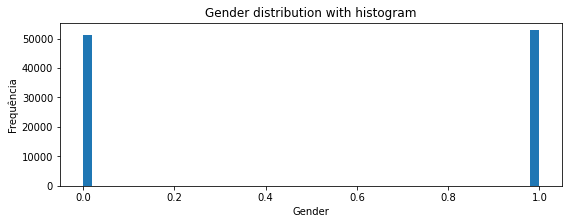

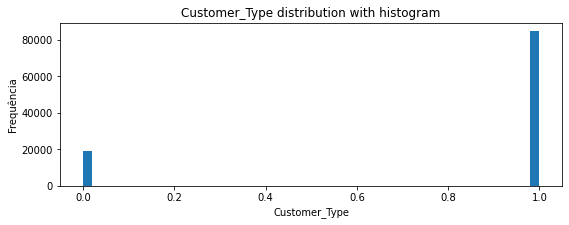

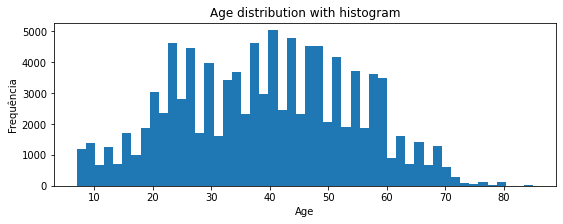

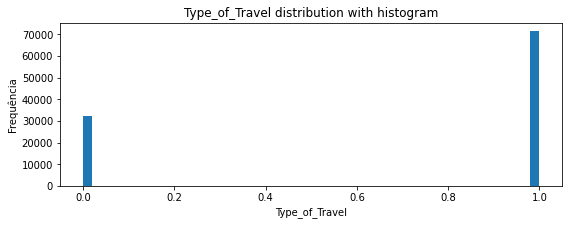

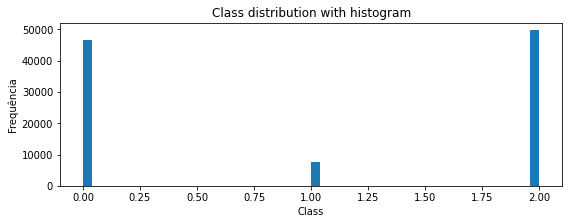

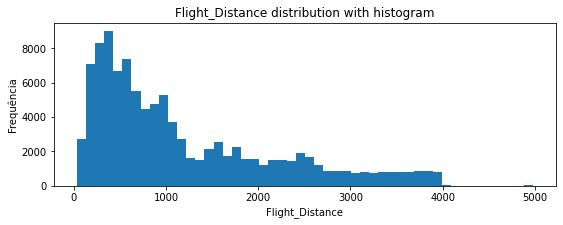

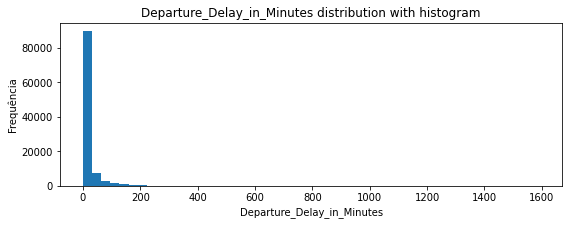

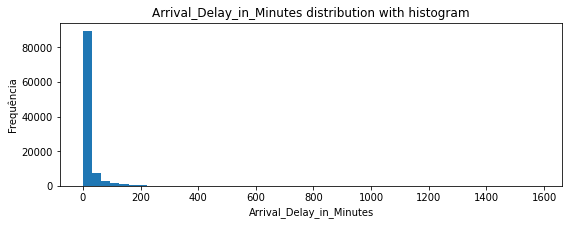

In [17]:
numericVar=["Gender", "Customer_Type", "Age", "Type_of_Travel", "Class", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]
for n in numericVar:
    plot_hist(n)

# ANÁLISE DAS CATEGORIAS DOS DADOS - CORRELAÇÃO ENTRE VARIÁVEIS

A variável 'Satisfaction' está com dois atributos, 'Satisfied" e "neutral or dissatisfied". 
Para a análise que será feita. Converteremos essa categoria em 1 e 0, já que o dataset não fez distinção entre neutralidade e insatisfação - embora esses conceitos seram distintos na literatura de marketing de serviços. Pessoas neutras terão relação com o negócio distinta das pessoas insatisfeitas (Herzberg, citado em Kotler & Keller, 2018).

In [18]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [19]:
df_train.describe()

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,0.507459,0.817322,39.379706,0.689627,1.028103,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,0.433333
std,29994.645522,37463.812252,0.499947,0.386404,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,0.495538
min,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,51951.500000,64856.500000,1.000000,1.000000,40.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,77927.250000,97368.250000,1.000000,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,103903.000000,129880.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [20]:
df_test.describe()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000,25976.000000
mean,12987.500000,65005.657992,0.507083,0.815253,39.620958,0.694410,1.035841,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.693756,0.438982
std,7498.769632,37611.526647,0.499959,0.388100,15.135685,0.460666,0.961744,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.466787,0.496272
min,0.000000,17.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6493.750000,32170.500000,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,0.000000
50%,12987.500000,65319.500000,1.000000,1.000000,40.000000,1.000000,1.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,0.000000
75%,19481.250000,97584.250000,1.000000,1.000000,51.000000,1.000000,2.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,1.000000
max,25975.000000,129877.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,1.000000



**CORRELAÇÃO LINEAR**

In [21]:
mpl.rcParams['figure.dpi'] = 200  #Parâmetros para os gráficos

In [22]:
features_response = df_train.columns.tolist()

In [23]:
items_to_remove = ['Unnamed: 0', 'id']


In [24]:
feature_response = [item for item in features_response if item not in items_to_remove]
features_response


['Unnamed:_0',
 'id',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

In [25]:
# CÁLCULO DA CORREÇÃO ENTRE AS VARIÁVEIS

corr = df_train[features_response].corr()
corr.iloc[2:21,2:21]

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service
Gender,1.000000,-0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.008974,-0.009142,-0.006951,-0.000333,-0.005772,0.042260,0.026502,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410
Customer_Type,-0.031732,1.000000,0.281674,-0.308333,0.105735,0.225200,0.007543,0.206869,0.019509,-0.006078,0.059454,0.189262,0.159484,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670
Age,-0.008928,0.281674,1.000000,0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427
Type_of_Travel,0.006909,-0.308333,0.048524,1.000000,0.545257,0.267344,0.105085,-0.259763,0.133511,0.030700,0.063439,0.224803,0.124399,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599
Class,-0.008253,0.105735,0.140565,0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,0.004150,0.085908,0.322924,0.227444,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353
Flight_Distance,-0.005828,0.225200,0.099461,0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540
Inflight_wifi_service,-0.008974,0.007543,0.017859,0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441
Departure/Arrival_time_convenient,-0.009142,0.206869,0.038125,-0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318
Ease_of_Online_booking,-0.006951,0.019509,0.024842,0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272
Gate_location,-0.000333,-0.006078,-0.001330,0.030700,0.004150,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681


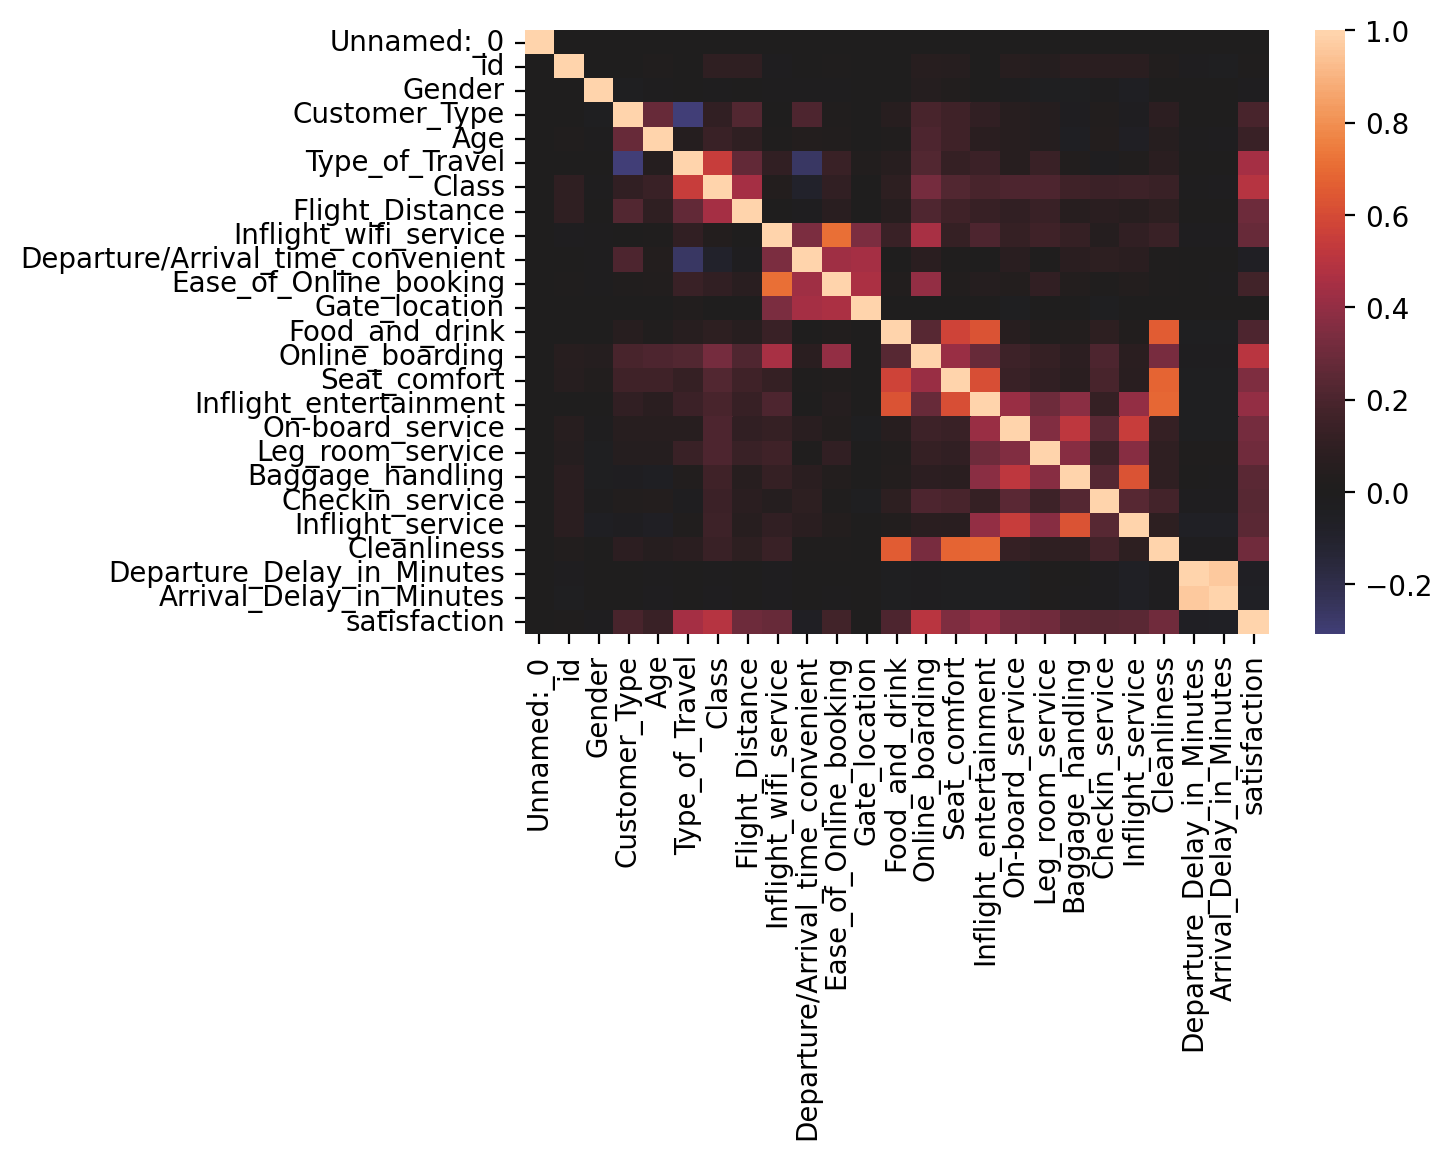

In [26]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           center=0)

# MODELAGEM - REGRESSÃO LOGÍSTICA


12. visão geral da média de satisfação

In [27]:
overall_satisfaction_rate = df_train['satisfaction'].mean()
overall_satisfaction_rate

0.43333269171542965

As variáveis escolhidas inicialmente para a regressão logística foram a distância do voo e a idade dos passageiros, porque apresentaram maiores correlações com a satisfação

In [28]:
group_by_Flight_Distance_y = df_train.groupby('Flight_Distance').agg({'satisfaction':np.mean})
group_by_Flight_Distance_y

,satisfaction
Flight_Distance,
31,0.375000
56,0.500000
67,0.351562
73,0.288136
74,0.266667
...,...
4243,0.611111
4502,0.500000
4817,0.200000


In [29]:
group_by_Flight_Distance_y = df_train.groupby('Age').agg({'satisfaction':np.mean})
group_by_Flight_Distance_y

,satisfaction
Age,
7,0.099644
8,0.107813
9,0.137283
10,0.131772
11,0.160767
...,...
77,0.183908
78,0.333333
79,0.285714


**Limite da decisão para regressão logística


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# RENOMEANDO O DATASET - UTILIZAREMOS APENAS O arquivo df_train

df = df_train

In [32]:
# CRIAÇÃO DA DIVISÃO TREINAMENTO / TESTE (dentro do arquivo df_train) para as variáveis IDADE (AGE) e TIPO DE VIAGEM (Type_of_Travel)

X_train, X_test, y_train, y_test = train_test_split(
df[['Age', 'Type_of_Travel']].values, df['satisfaction'].values,
test_size=0.2, random_state=24)

In [33]:
# TAMANHO DAS AMOSTRAS DE TREINO E DE TESTE

print(X_train.shape)
print(X_test.shape)

(83123, 2)
(20781, 2)


In [34]:
# IMPORTAÇÃO E OPÇÕES PADRÃO

from sklearn.linear_model import LogisticRegression


In [35]:
lr_model = LogisticRegression(solver='liblinear')


In [36]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# TREINAMENTO DO MODELO DE REGRESSAO LOGÍSTICA

lr_model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = lr_model.predict(X_test)


In [39]:
y_pred_proba = lr_model.predict_proba(X_test)


In [40]:
print(lr_model.coef_, lr_model.intercept_)


[[0.02195416 2.54120355]] [-3.07315863]


In [41]:
np.ones((X_test.shape[0],1)).shape


(20781, 1)

In [42]:
ones_and_features = np.hstack([np.ones((X_test.shape[0],1)), X_test])
ones_and_features

array([[ 1., 32.,  1.],
       [ 1., 15.,  1.],
       [ 1., 35.,  1.],
       ...,
       [ 1., 46.,  1.],
       [ 1., 48.,  1.],
       [ 1., 38.,  1.]])

In [43]:
intercept_and_coefs = np.concatenate([lr_model.intercept_.reshape(1,1), lr_model.coef_], axis=1)
intercept_and_coefs

array([[-3.07315863,  0.02195416,  2.54120355]])

In [44]:
X_lin_comb = np.dot(intercept_and_coefs, np.transpose(ones_and_features))


In [45]:
# CRIAÇÃO DE CURVA SIGMOID

def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

In [46]:
y_pred_proba_manual = sigmoid(X_lin_comb)


In [47]:
y_pred_manual = y_pred_proba_manual >= 0.5


In [48]:
# 
y_pred.shape


(20781,)

In [49]:
# CÁLCULO DA PREDIÇÃO MANUAL

y_pred_manual.shape


(1, 20781)

In [50]:
# COMPARAÇÃO DOS ARRAYS, VERIFICANDO SE TODOS OS ELEMENTOS SÃO IGUAIS

np.array_equal(y_pred.reshape(1,-1), y_pred_manual)


True

In [51]:
from sklearn.metrics import roc_auc_score


In [52]:
y_test.shape


(20781,)

In [53]:
y_pred_proba_manual.shape


(1, 20781)

# MÉTRICAS DE DESEMPENHO DA REGRESSÃO LOGÍSTICA: CURVAS ROC AUC

In [54]:
# SCORE DA PREDIÇÃO MANUAL

roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1],))


0.7721385722116643

In [55]:
# SCORE DA PREDIÇÃO CALCULADA PELO SCIKIT-LEARN

roc_auc_score(y_test, y_pred_proba[:,1])


0.7721385722116643

# **ÁRVORE DE DECISÕES**

In [56]:
# VISUALIZAR ÁRVORES DE DECISÕES
import graphviz 

In [57]:
features_response = df.columns.tolist()

In [58]:
items_to_remove = ['Unnamed:_0']

In [59]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['id',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [61]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['satisfaction'].values,
test_size=0.2, random_state=24)

In [62]:
dt = tree.DecisionTreeClassifier(max_depth=3)


In [63]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:

dot_data = tree.export_graphviz(dt, out_file=None,
                                filled=True, rounded=True,
                                feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

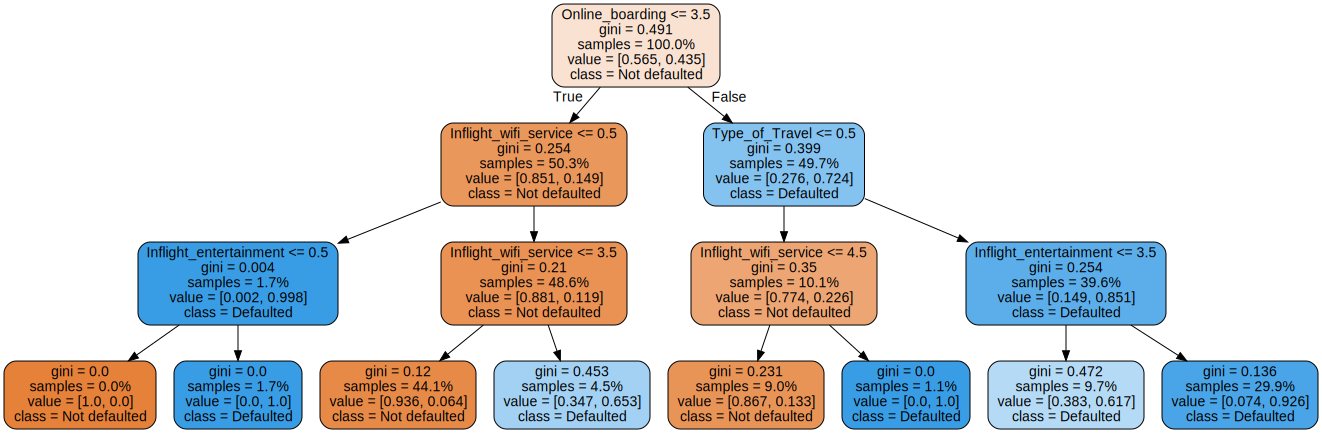

In [65]:
graph = graphviz.Source(dot_data) 
graph

In [66]:
features_response[:-1].index('Type_of_Travel')

4

In [67]:
X_train.shape


(83123, 23)

In [68]:
sum(X_train[:,4] <= 1.5)/X_train.shape[0]


1.0

In [69]:
np.mean(y_train)


0.43468113518520746

In [70]:
dt.max_depth = None


In [71]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Treinamento de árvore de decisões: Node Impurity


In [72]:
pm0 = np.linspace(0.01,0.99,99)
pm1 = 1 - pm0


In [73]:
pm0


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [74]:
pm1


array([0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89,
       0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78,
       0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67,
       0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56,
       0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
       0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01])

In [75]:
misclassification_rate = np.minimum(pm0, pm1)


In [76]:
misclassification_rate


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
       0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01])

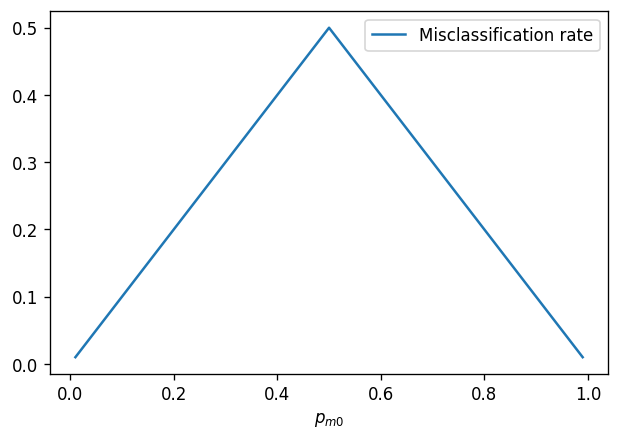

In [77]:
mpl.rcParams['figure.dpi'] = 120
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

In [78]:
gini = (pm0 * (1-pm0)) + (pm1 * (1-pm1))

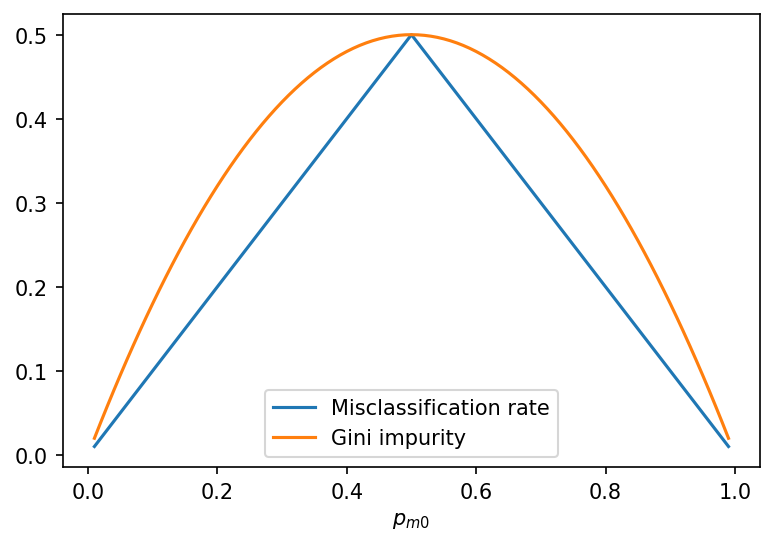

In [79]:
mpl.rcParams['figure.dpi'] = 150
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.xlabel('$p_{m0}$')
plt.legend()

In [80]:
cross_ent = -1*( (pm0 * np.log(pm0)) + (pm1 * np.log(pm1)) )

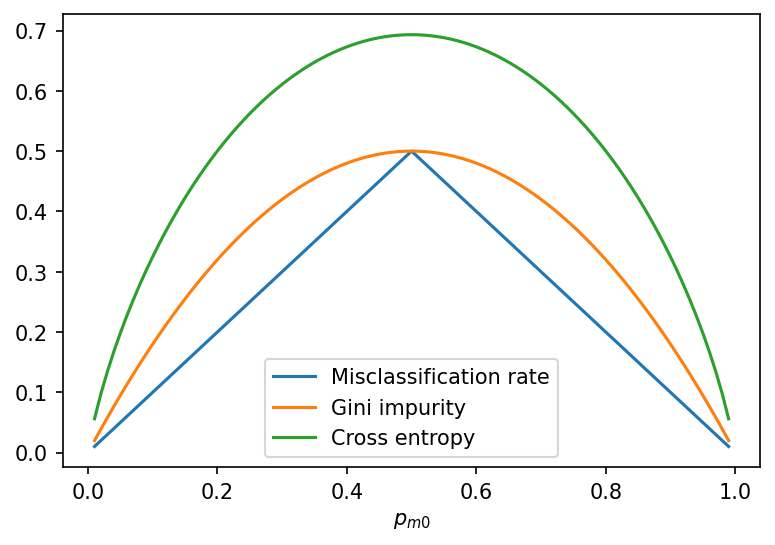

In [81]:
mpl.rcParams['figure.dpi'] = 150
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')
plt.xlabel('$p_{m0}$')
plt.legend()

# Árvode de decisões com dados randômicos 


In [82]:
from sklearn.datasets import make_circles


In [83]:
X_circ, y_circ = make_circles(n_samples = 300, shuffle=True,
                             noise=0.1, random_state=1, factor=0.4)

In [84]:
from matplotlib.colors import ListedColormap

In [85]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

[]

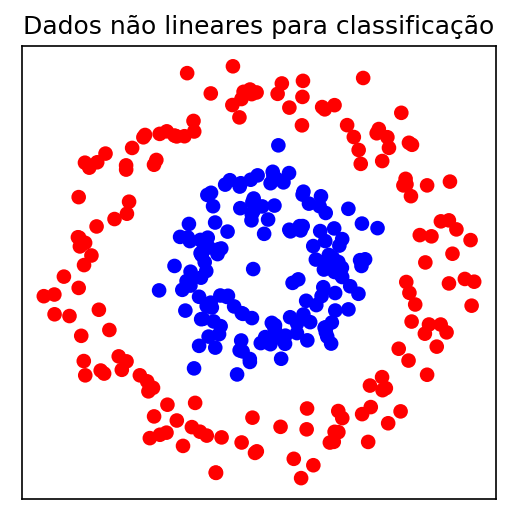

In [86]:
ax = plt.axes()
ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=cm_bright)
ax.set_aspect('equal')
ax.set_title('Dados não lineares para classificação')
ax.set_xticks([])
ax.set_yticks([])

In [87]:
x_min, x_max = X_circ[:, 0].min() - .5, X_circ[:, 0].max() + .5
y_min, y_max = X_circ[:, 1].min() - .5, X_circ[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
classifiers = [tree.DecisionTreeClassifier(max_depth=4, random_state=4),
              LogisticRegression()]
titles = ['Árvore de decisões', 'Regressão logística']

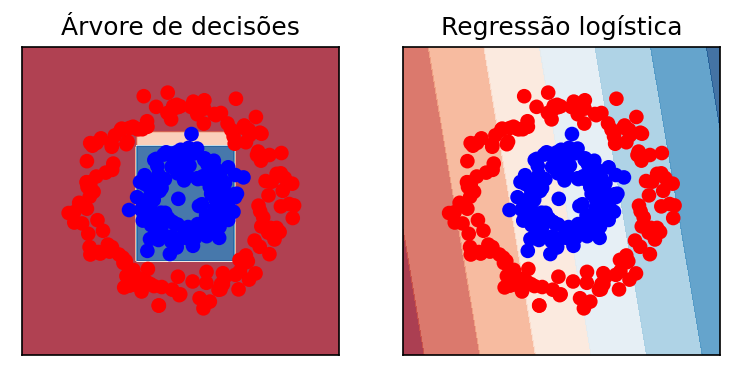

In [90]:
counter = 1
for classif in classifiers:
    ax = plt.subplot(1, 2, counter)
    classif.fit(X_circ, y_circ)
    Z = classif.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=cm_bright)
    ax.set_aspect('equal')
    ax.set_title(titles[counter-1])
    ax.set_xticks([])
    ax.set_yticks([])
    counter+=1

# Hiperparâmetros para árvore de decisões

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:

X_train.shape

(83123, 23)

In [93]:
params = {'max_depth':[1, 4, 6, 8, 10, 12]}
# params = {'max_depth':list(range(1,13))}


# VALIDAÇÃO CRUZADA

In [94]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)


In [95]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.1s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 4, 6, 8, 10, 12]}, pre_dispatch=None

In [96]:
cv_results_df = pd.DataFrame(cv.cv_results_)


In [97]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.071346,0.002374,0.010149,0.001610,1,{'max_depth': 1},0.792736,0.792497,0.793413,0.791529,0.792544,0.000675,6,0.792480,0.792560,0.792254,0.792882,0.792544,0.000225
1,0.217451,0.003174,0.009475,0.000248,4,{'max_depth': 4},0.952894,0.952860,0.949604,0.953963,0.952330,0.001635,5,0.952136,0.952951,0.953218,0.951783,0.952522,0.000584
2,0.297521,0.005018,0.009973,0.000247,6,{'max_depth': 6},0.976125,0.976251,0.975265,0.976761,0.976101,0.000538,4,0.976343,0.976998,0.976818,0.975952,0.976528,0.000410
3,0.354028,0.006128,0.010276,0.000248,8,{'max_depth': 8},0.983480,0.983416,0.983579,0.984391,0.983716,0.000394,2,0.985994,0.986079,0.986377,0.985623,0.986018,0.000269
4,0.400712,0.005433,0.010282,0.000063,10,{'max_depth': 10},0.983354,0.982937,0.984633,0.985395,0.984080,0.000984,1,0.991176,0.991171,0.991513,0.991301,0.991290,0.000139
5,0.435326,0.004183,0.010389,0.000081,12,{'max_depth': 12},0.977923,0.976883,0.977994,0.980982,0.978446,0.001529,3,0.994708,0.994849,0.995005,0.994712,0.994819,0.000122


In [98]:
cv_results_df.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

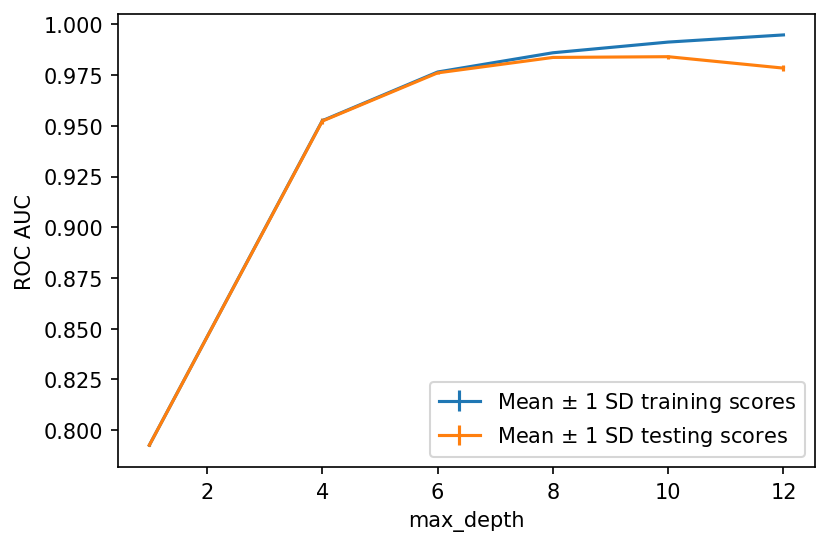

In [99]:
# CURVA ROC AUC

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [100]:
cv_results_df.max()


mean_fit_time          0.435326
std_fit_time           0.006128
mean_score_time        0.010389
std_score_time         0.001610
param_max_depth       12.000000
split0_test_score      0.983480
split1_test_score      0.983416
split2_test_score      0.984633
split3_test_score      0.985395
mean_test_score        0.984080
std_test_score         0.001635
rank_test_score        6.000000
split0_train_score     0.994708
split1_train_score     0.994849
split2_train_score     0.995005
split3_train_score     0.994712
mean_train_score       0.994819
std_train_score        0.000584
dtype: float64

# Fitting a Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier


In [102]:
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

In [103]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}


In [104]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [105]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [106]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

In [107]:
cv_rf_ex_results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.294914,0.008085,0.027082,0.002025,10,{'n_estimators': 10},0.942405,0.943181,0.939804,0.942700,0.942022,0.001311,10,0.941582,0.942126,0.942819,0.941783,0.942077,0.000470
1,0.564609,0.004862,0.038625,0.000701,20,{'n_estimators': 20},0.952620,0.951538,0.949671,0.952030,0.951465,0.001104,9,0.951958,0.951600,0.952132,0.950741,0.951608,0.000536
2,0.870575,0.014235,0.052467,0.001089,30,{'n_estimators': 30},0.958622,0.957496,0.956530,0.958863,0.957878,0.000933,1,0.958248,0.957764,0.958640,0.957415,0.958017,0.000466
3,1.141698,0.003485,0.067230,0.001793,40,{'n_estimators': 40},0.958412,0.957010,0.955850,0.957899,0.957293,0.000972,2,0.957746,0.957385,0.958143,0.956417,0.957422,0.000640
4,1.427695,0.017958,0.080579,0.000855,50,{'n_estimators': 50},0.957082,0.955967,0.955063,0.956852,0.956241,0.000798,3,0.956356,0.956429,0.957293,0.955504,0.956395,0.000633
5,1.722193,0.011946,0.095315,0.001799,60,{'n_estimators': 60},0.955723,0.954741,0.953778,0.955707,0.954987,0.000803,6,0.955084,0.955134,0.956214,0.954198,0.955158,0.000714
6,2.025297,0.005906,0.110003,0.002410,70,{'n_estimators': 70},0.955480,0.954515,0.953666,0.955284,0.954736,0.000715,8,0.954848,0.954998,0.955969,0.953906,0.954930,0.000731
7,2.273761,0.011675,0.122890,0.000977,80,{'n_estimators': 80},0.955666,0.954894,0.953700,0.955513,0.954943,0.000773,7,0.955023,0.955344,0.956036,0.954173,0.955144,0.000670
8,2.533441,0.010096,0.140537,0.002380,90,{'n_estimators': 90},0.956084,0.955386,0.954196,0.956068,0.955433,0.000768,5,0.955512,0.955759,0.956456,0.954711,0.955610,0.000624
9,2.786158,0.010325,0.151472,0.002520,100,{'n_estimators': 100},0.956380,0.955544,0.954526,0.956569,0.955755,0.000807,4,0.955839,0.955990,0.956704,0.955216,0.955938,0.000529


In [108]:
cv_rf_ex_results_df.max()


mean_fit_time           2.786158
std_fit_time            0.017958
mean_score_time         0.151472
std_score_time          0.002520
param_n_estimators    100.000000
split0_test_score       0.958622
split1_test_score       0.957496
split2_test_score       0.956530
split3_test_score       0.958863
mean_test_score         0.957878
std_test_score          0.001311
rank_test_score        10.000000
split0_train_score      0.958248
split1_train_score      0.957764
split2_train_score      0.958640
split3_train_score      0.957415
mean_train_score        0.958017
std_train_score         0.000731
dtype: float64

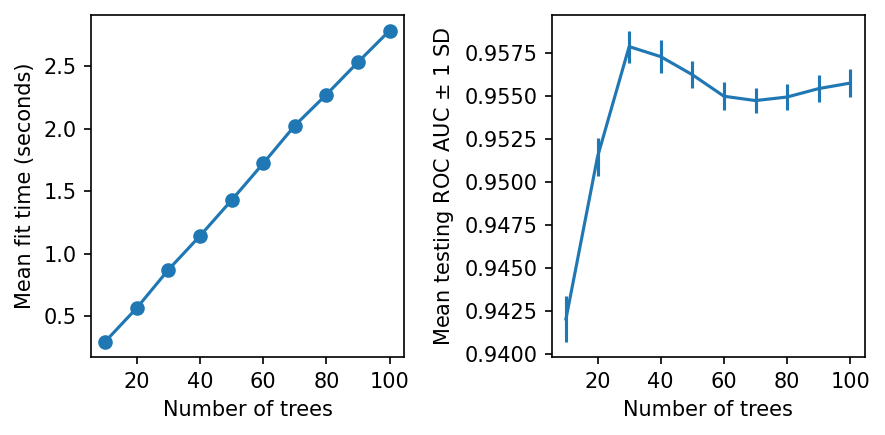

In [109]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [110]:
cv_rf_ex.best_params_


{'n_estimators': 30}

In [111]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})

In [112]:
feat_imp_df.sort_values('Importance', ascending=False)


,Feature name,Importance
12,Online_boarding,0.327166
5,Class,0.134391
7,Inflight_wifi_service,0.109422
4,Type_of_Travel,0.107317
14,Inflight_entertainment,0.085591
13,Seat_comfort,0.049746
15,On-board_service,0.046750
16,Leg_room_service,0.039603
6,Flight_Distance,0.022453
9,Ease_of_Online_booking,0.016754


# Cross-Validation Grid Search with Random Forest

In [113]:
rf_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [114]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc',
                  n_jobs=-1, refit=True, cv=4, verbose=2,
                  error_score=np.nan, return_train_score=True)

In [115]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  4.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [116]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

In [117]:
cv_rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.441406,0.017558,0.034624,0.000872,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.942405,0.943181,0.939804,0.942700,0.942022,0.001311,16,0.941582,0.942126,0.942819,0.941783,0.942077,0.000470
1,2.183933,0.013344,0.116894,0.006168,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.957082,0.955967,0.955063,0.956852,0.956241,0.000798,14,0.956356,0.956429,0.957293,0.955504,0.956395,0.000633
2,4.283890,0.029846,0.213986,0.003033,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.956380,0.955544,0.954526,0.956569,0.955755,0.000807,15,0.955839,0.955990,0.956704,0.955216,0.955938,0.000529
3,8.568626,0.096512,0.419227,0.010183,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.958511,0.957701,0.956607,0.959278,0.958024,0.000990,13,0.958120,0.957861,0.958995,0.957859,0.958209,0.000466
4,0.713364,0.007934,0.040950,0.000655,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.975295,0.975854,0.973426,0.976758,0.975333,0.001219,12,0.975550,0.975507,0.976641,0.976250,0.975987,0.000479
5,3.525902,0.039353,0.138169,0.003348,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.977353,0.979005,0.975926,0.978851,0.977784,0.001252,11,0.977488,0.978854,0.978729,0.978362,0.978358,0.000534
6,7.054570,0.115401,0.271176,0.003719,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.978508,0.979021,0.976782,0.979753,0.978516,0.001094,10,0.978636,0.978986,0.979466,0.979162,0.979063,0.000300
7,13.662853,0.061626,0.505499,0.005248,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.979432,0.979904,0.977620,0.980512,0.979367,0.001079,9,0.979617,0.979743,0.980228,0.979977,0.979891,0.000234
8,0.923623,0.007461,0.046714,0.000462,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.986522,0.986396,0.984928,0.986276,0.986031,0.000642,8,0.988519,0.987912,0.988515,0.987936,0.988221,0.000297
9,4.602834,0.071702,0.170581,0.002006,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.988053,0.988257,0.986675,0.988406,0.987848,0.000689,7,0.989757,0.989583,0.989938,0.989862,0.989785,0.000133


In [118]:
cv_rf_results_df.max()


mean_fit_time          20.851273
std_fit_time            0.247883
mean_score_time         0.767617
std_score_time          0.010183
param_max_depth        12.000000
param_n_estimators    200.000000
split0_test_score       0.991895
split1_test_score       0.992451
split2_test_score       0.991012
split3_test_score       0.992072
mean_test_score         0.991858
std_test_score          0.001311
rank_test_score        16.000000
split0_train_score      0.996031
split1_train_score      0.996063
split2_train_score      0.996250
split3_train_score      0.996089
mean_train_score        0.996108
std_train_score         0.000633
dtype: float64

In [119]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))


In [120]:
cm_rf = plt.cm.jet


Text(0, 0.5, 'Maximum depth')

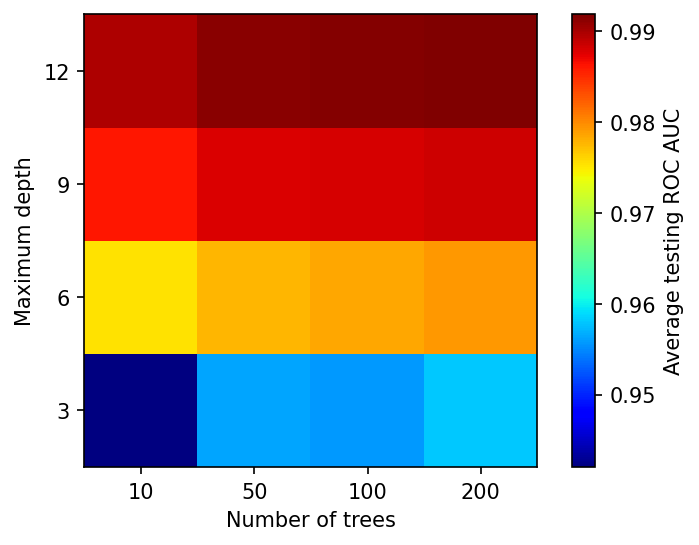

In [121]:

ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [122]:
cv_rf.best_params_


{'max_depth': 12, 'n_estimators': 200}

In [123]:
feat_imp_df_act = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf.best_estimator_.feature_importances_
})


In [124]:
feat_imp_df_act.sort_values('Importance', ascending=False)


,Feature name,Importance
12,Online_boarding,0.174442
7,Inflight_wifi_service,0.159618
4,Type_of_Travel,0.112706
5,Class,0.108345
14,Inflight_entertainment,0.074587
13,Seat_comfort,0.047532
2,Customer_Type,0.042673
9,Ease_of_Online_booking,0.039723
16,Leg_room_service,0.038921
6,Flight_Distance,0.025422
